<a href="https://colab.research.google.com/github/2403A51L10/AIML_25/blob/main/2403A51L10_A6_Batch_51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hall Ticket No:** 2403A51L10


# **Prediction of National Poll on health Aging**

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression
from google.colab import drive
drive.mount('/content/drive')
file_path='/content/drive/MyDrive/NPHA-doctor-visits.csv'
data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Q1. Identify the top 5 reasons for health aging?**


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Number of Doctors Visited                   714 non-null    int64
 1   Age                                         714 non-null    int64
 2   Phyiscal Health                             714 non-null    int64
 3   Mental Health                               714 non-null    int64
 4   Dental Health                               714 non-null    int64
 5   Employment                                  714 non-null    int64
 6   Stress Keeps Patient from Sleeping          714 non-null    int64
 7   Medication Keeps Patient from Sleeping      714 non-null    int64
 8   Pain Keeps Patient from Sleeping            714 non-null    int64
 9   Bathroom Needs Keeps Patient from Sleeping  714 non-null    int64
 10  Uknown Keeps Patient fro

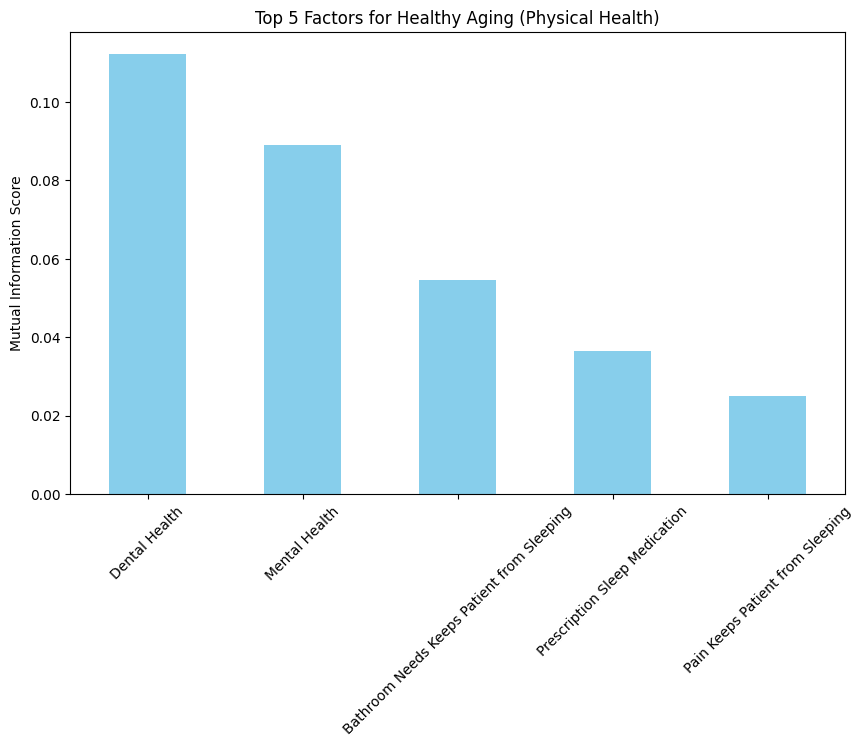

In [8]:
# Display basic information about the dataset
print("Dataset Info:")
print(data.info())
print("\nDataset Head:")
print(data.head())
# Define predictors (X) and target (y)
X = data.drop(columns=["Phyiscal Health"])  # Replace with target column name
y = data["Phyiscal Health"]
# Calculate Mutual Information Scores
mutual_info_scores = mutual_info_regression(X, y, random_state=42)
mi_scores = pd.Series(mutual_info_scores, index=X.columns).sort_values(ascending=False)
# Display the Top 5 Factors
top_5_factors = mi_scores.head(5)
print("\nTop 5 Factors for Healthy Aging:")
print(top_5_factors)
# Visualize the Top 5 Factors
plt.figure(figsize=(10, 6))
top_5_factors.plot(kind="bar", color="skyblue")
plt.title("Top 5 Factors for Healthy Aging (Physical Health)")
plt.ylabel("Mutual Information Score")
plt.xticks(rotation=45)
plt.show()



**Q2. Name the community which has highest aging issues?**

In [9]:
# Group data by Race and calculate the average Physical Health score
race_physical_health = data.groupby("Race")["Phyiscal Health"].mean()
# Identify the community (Race) with the lowest average Physical Health score
lowest_health_race = race_physical_health.idxmin()
lowest_health_score = race_physical_health.min()
# Display results
print("Average Physical Health Scores by Race:")
print(race_physical_health.sort_values())
print(f"\nCommunity with the highest aging issues (lowest health score): Race {lowest_health_race}")
print(f"Lowest Average Physical Health Score: {lowest_health_score:.2f}")

Average Physical Health Scores by Race:
Race
1    2.769896
2    2.788462
3    2.850000
4    2.931818
5    3.150000
Name: Phyiscal Health, dtype: float64

Community with the highest aging issues (lowest health score): Race 1
Lowest Average Physical Health Score: 2.77


**Q3. Identify the gender which has the most aging and least aging issues**

In [10]:
# Group data by Gender and calculate the average Physical Health score
gender_physical_health = data.groupby("Gender")["Phyiscal Health"].mean()
# Identify genders with the most and least aging issues
most_aging_gender = gender_physical_health.idxmin()
least_aging_gender = gender_physical_health.idxmax()
most_aging_score = gender_physical_health.min()
least_aging_score = gender_physical_health.max()
# Display results
print("Average Physical Health Scores by Gender:")
print(gender_physical_health.sort_values())
print(f"\nGender with the most aging issues (lowest health score): Gender {most_aging_gender}")
print(f"Lowest Average Physical Health Score: {most_aging_score:.2f}")
print(f"\nGender with the least aging issues (highest health score): Gender {least_aging_gender}")
print(f"Highest Average Physical Health Score: {least_aging_score:.2f}")


Average Physical Health Scores by Gender:
Gender
2    2.763359
1    2.831776
Name: Phyiscal Health, dtype: float64

Gender with the most aging issues (lowest health score): Gender 2
Lowest Average Physical Health Score: 2.76

Gender with the least aging issues (highest health score): Gender 1
Highest Average Physical Health Score: 2.83


**Q4. Does Age, employment and mental stress contribute to health aging?**

Correlation Matrix:
                                    Age  Employment  \
Age                                 NaN         NaN   
Employment                          NaN    1.000000   
Stress Keeps Patient from Sleeping  NaN   -0.043106   
Phyiscal Health                     NaN    0.147526   

                                    Stress Keeps Patient from Sleeping  \
Age                                                                NaN   
Employment                                                   -0.043106   
Stress Keeps Patient from Sleeping                            1.000000   
Phyiscal Health                                               0.034014   

                                    Phyiscal Health  
Age                                             NaN  
Employment                                 0.147526  
Stress Keeps Patient from Sleeping         0.034014  
Phyiscal Health                            1.000000  


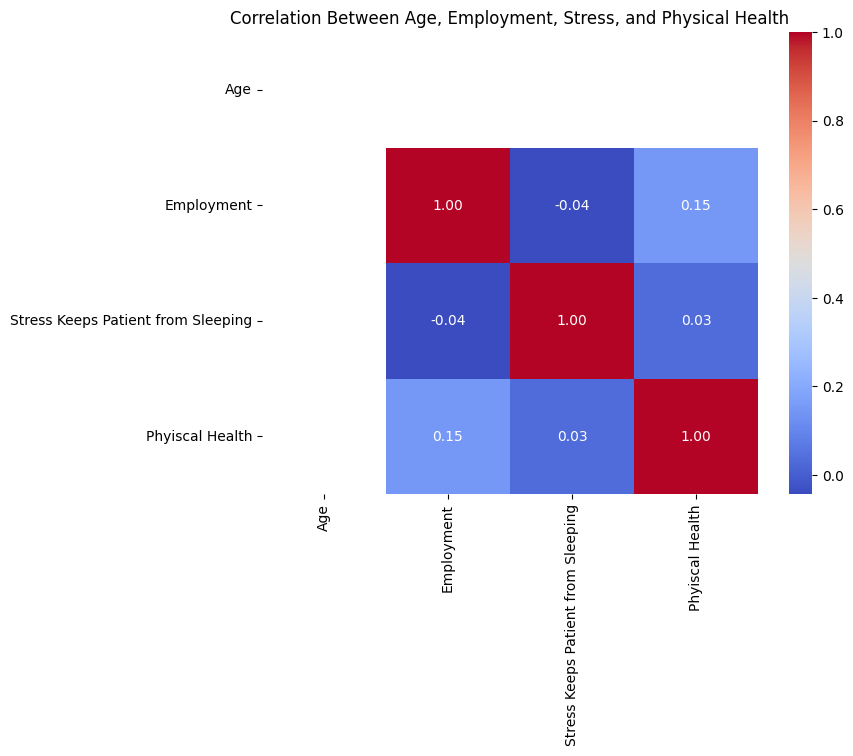


Mutual Information Scores:
Stress Keeps Patient from Sleeping    0.024151
Age                                   0.000000
Employment                            0.000000
dtype: float64


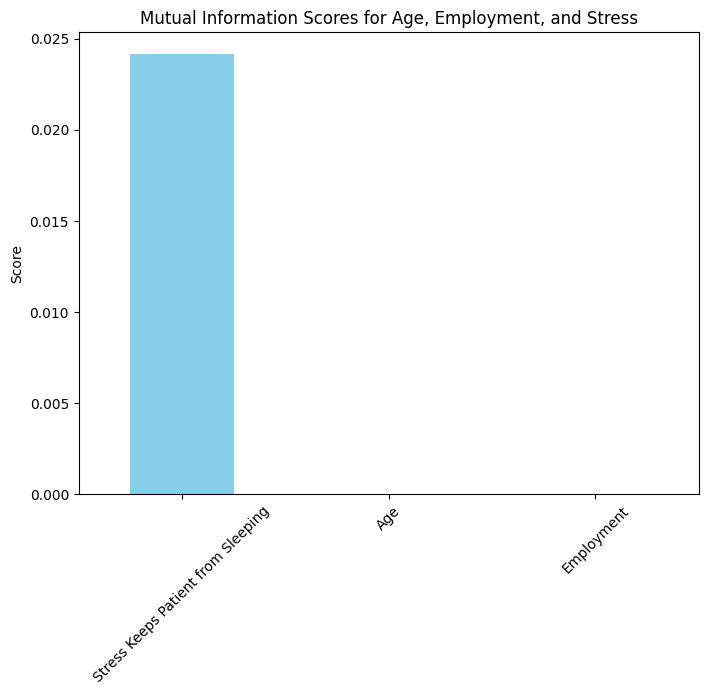

In [11]:
# Select relevant columns for analysis
selected_features = ["Age", "Employment", "Stress Keeps Patient from Sleeping", "Phyiscal Health"]
subset = data[selected_features]
# Correlation Analysis
correlation_matrix = subset.corr()
print("Correlation Matrix:")
print(correlation_matrix)
# Visualize the Correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Age, Employment, Stress, and Physical Health")
plt.show()
# Mutual Information Analysis
X = subset.drop(columns=["Phyiscal Health"])  # Features
y = subset["Phyiscal Health"]  # Target
mutual_info_scores = mutual_info_regression(X, y, random_state=42)
mi_scores = pd.Series(mutual_info_scores, index=X.columns).sort_values(ascending=False)
# Display Mutual Information Scores
print("\nMutual Information Scores:")
print(mi_scores)
# Visualize Mutual Information Scores
plt.figure(figsize=(8, 6))
mi_scores.plot(kind="bar", color="skyblue")
plt.title("Mutual Information Scores for Age, Employment, and Stress")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()

**Q5. Name the category which visited most number of doctors?**

In [12]:
# Group data by Gender and calculate the average Number of Doctors Visited
doctor_visits_by_gender = data.groupby("Gender")["Number of Doctors Visited"].mean()
# Group data by Race and calculate the average Number of Doctors Visited
doctor_visits_by_race = data.groupby("Race")["Number of Doctors Visited"].mean()
# Identify the category (Gender or Race) with the most number of doctor visits
most_doctors_visited_gender = doctor_visits_by_gender.idxmax()
most_doctors_visited_race = doctor_visits_by_race.idxmax()
most_doctors_visited_gender_score = doctor_visits_by_gender.max()
most_doctors_visited_race_score = doctor_visits_by_race.max()
# Display results
print("Average Number of Doctors Visited by Gender:")
print(doctor_visits_by_gender)
print("\nAverage Number of Doctors Visited by Race:")
print(doctor_visits_by_race)
print(f"\nGender with the most number of doctor visits: {most_doctors_visited_gender} with {most_doctors_visited_gender_score:.2f} visits")
print(f"Race with the most number of doctor visits: {most_doctors_visited_race} with {most_doctors_visited_race_score:.2f} visits")


Average Number of Doctors Visited by Gender:
Gender
1    2.112150
2    2.111959
Name: Number of Doctors Visited, dtype: float64

Average Number of Doctors Visited by Race:
Race
1    2.131488
2    2.076923
3    2.000000
4    1.863636
5    2.300000
Name: Number of Doctors Visited, dtype: float64

Gender with the most number of doctor visits: 1 with 2.11 visits
Race with the most number of doctor visits: 5 with 2.30 visits
